# PSFEx Im3shape Example

I'm going to assume that you have:  
 - an image file that you have already located your sources in  
 - a PSFEx output file, called "psf_example.psf"  
 
This first line loads the pylab interactive environment for this notebook.  In a normal script to run on lots of images you would leave it out:

In [1]:
pylab inline

Populating the interactive namespace from numpy and matplotlib


Load the python modules we will need

In [2]:
import py3shape
import numpy as np
import galsim
import galsim.des
from astropy.io import fits

Use the example image file that comes from im3shape.  It doesn't really make sense to use this with the PSF we load below because that is not really the correct PSF for this image.

In [3]:
image_filename = "./example/image.fits"
full_image = fits.getdata(image_filename)

Cut out a single object from the image to use.  Because the example image file is just a regular grid we just pull out the top corner. In a real image you would need to find the object you wanted with x and y coordinates.

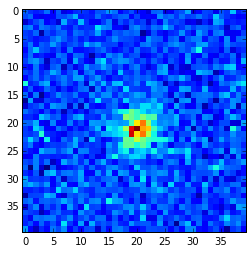

In [4]:
stamp = full_image[:40,:40]
pylab.imshow(stamp, interpolation="nearest")
stamp_size = stamp.shape[0]

Now read the im3shape parameter file.

In [5]:
options = py3shape.Options()
options.read("./example/example.ini")
options.stamp_size = stamp_size

The PSFEx files do not contain images of the PSF but instead decsribe the variation of the PSF across the image using basis shapes and polynomial coefficients.  Here we use galsim to load those coefficents:

In [6]:
psf_filename = "psfex_example.psf"
psf_data = galsim.des.DES_PSFEx(psf_filename)

Use the position in the image and the size of the stamp to work out some parameters for the shape and location of the PSF. x and y here are the position of the postage stamp in the wider image. 

In [7]:
x,y = 20,20
nx = ny = (stamp_size+options.padding)*options.upsampling

Get an array of the PSF at this position in the focal plane

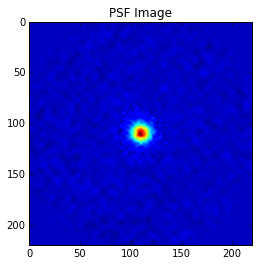

In [8]:
psf = py3shape.utils.getPSFExarray(psf_data, x, y, nx, ny, options.upsampling)
imshow(psf, interpolation='nearest')
title("PSF Image")

Run im3shape.  
The returned fitted model is normalized to 1.0, so scale it up to match the input image.  
You could also add a weight= option to py3shape.analyze with a weight image the same size as the data image - you should do this.

In [9]:
results, fit = py3shape.analyze(stamp, psf, options)
fit *= stamp.sum()

Show the fitted image and the residuals

<matplotlib.colorbar.Colorbar instance at 0x1139d10e0>

/usr/local/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


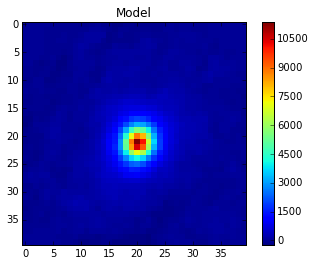

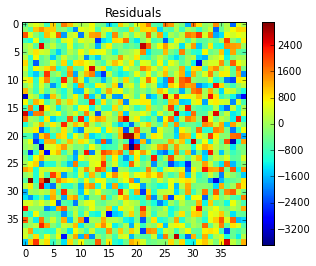

In [10]:
imshow(fit, interpolation='nearest')
title("Model")
colorbar()
figure()
imshow(fit-stamp, interpolation='nearest')
title("Residuals")
colorbar()

The results object also returned by py3shape.analyze contains the parameters

In [11]:
p=results.get_params()
print "e1 = {}    e2 = {}   r = {}".format(p.e1, p.e2, p.radius)

e1 = -0.0991924450855    e2 = -0.108925378414   r = 2.44430739985


You can view the full set of results like this:

In [12]:
for key, value in results.as_dict(0,results.number_varied_params)[0].items():
    print "{} = {}".format(key, value)

x0 = 20.7746418381
y0 = 21.8365569328
e1 = -0.0991924450855
e2 = -0.108925378414
radius = 2.44430739985
radius_ratio = 1.0
bulge_A = 11.9579909796
disc_A = 0.0184697118497
bulge_index = 4.0
disc_index = 1.0
delta_e_bulge = 0.0
delta_theta_bulge = 0.0
identifier = 2016712161950
time = 0.886273
bulge_flux = 0.309212772774
disc_flux = 0.101454500524
flux_ratio = 0.752952068205
snr = 39.5264701124
old_snr = 39.5264703261
min_residuals = -0.00747191417352
max_residuals = 0.00883914731643
model_min = -0.000561836218109
model_max = 0.0273510455046
likelihood = -884.699522726
levmar_start_error = 95562.3962571
levmar_end_error = 1769.39904545
levmar_resid_grad = 0.000871920692817
levmar_vector_diff = 2.53512757471e-10
levmar_error_diff = 2.50534210886e-08
levmar_comp_grad = 9.56402914534e-10
levmar_iterations = 9
levmar_reason = 8
levmar_like_evals = 88
levmar_grad_evals = 9
levmar_sys_evals = 9
mean_flux = 0.0
number_varied_params = 7
covmat_0_0 = 0.0060332961366
covmat_0_1 = -0.0004321042484